In [127]:
import os
import isx
import time
import numpy
import pandas as pd
import matplotlib.pyplot as plt

folder_cellset = r'\\172.16.251.125\Inscopix\Francesco\H2230 - 4X\H2230_4X_EGO_PH2\H2230_EGO_PH2_LR_2\H2230_EGO_PH2_LR_2_data' 

folder_out = r'\\172.16.251.125\Inscopix\Francesco\for maps - temp\H22'

FILE_NAME='2020-12-07-11-50-34_video-PP-BP-MC-CNMFE-Sess-p18-LCR.isxd'
events_name='2020-12-07-11-50-34_video-PP-BP-MC-CNMFE-Sess-p18-LCR-ED.isxd'

name='H2230_E28_2'

# Input stage as the dictionary key, then list MC recordings
cellset_file = os.path.join(folder_cellset, FILE_NAME)
events_file= os.path.join(folder_cellset, events_name)
metrics_file = os.path.join(folder_out, name+'_metrics.csv')

if not os.path.exists(metrics_file):
                            isx.cell_metrics(cellset_file, events_file, metrics_file)

metrics_df = pd.read_csv(metrics_file)
cellset = isx.CellSet.read(cellset_file)
accepted_cells = [cellset.get_cell_name(k) for k in range(cellset.num_cells) if cellset.get_cell_status(k) != 'rejected']

# Create a logical index that only references accepted cells with reasonable SNRs.
accept_i = metrics_df.cellName.isin(accepted_cells) #& (metrics_df.snr > 1)

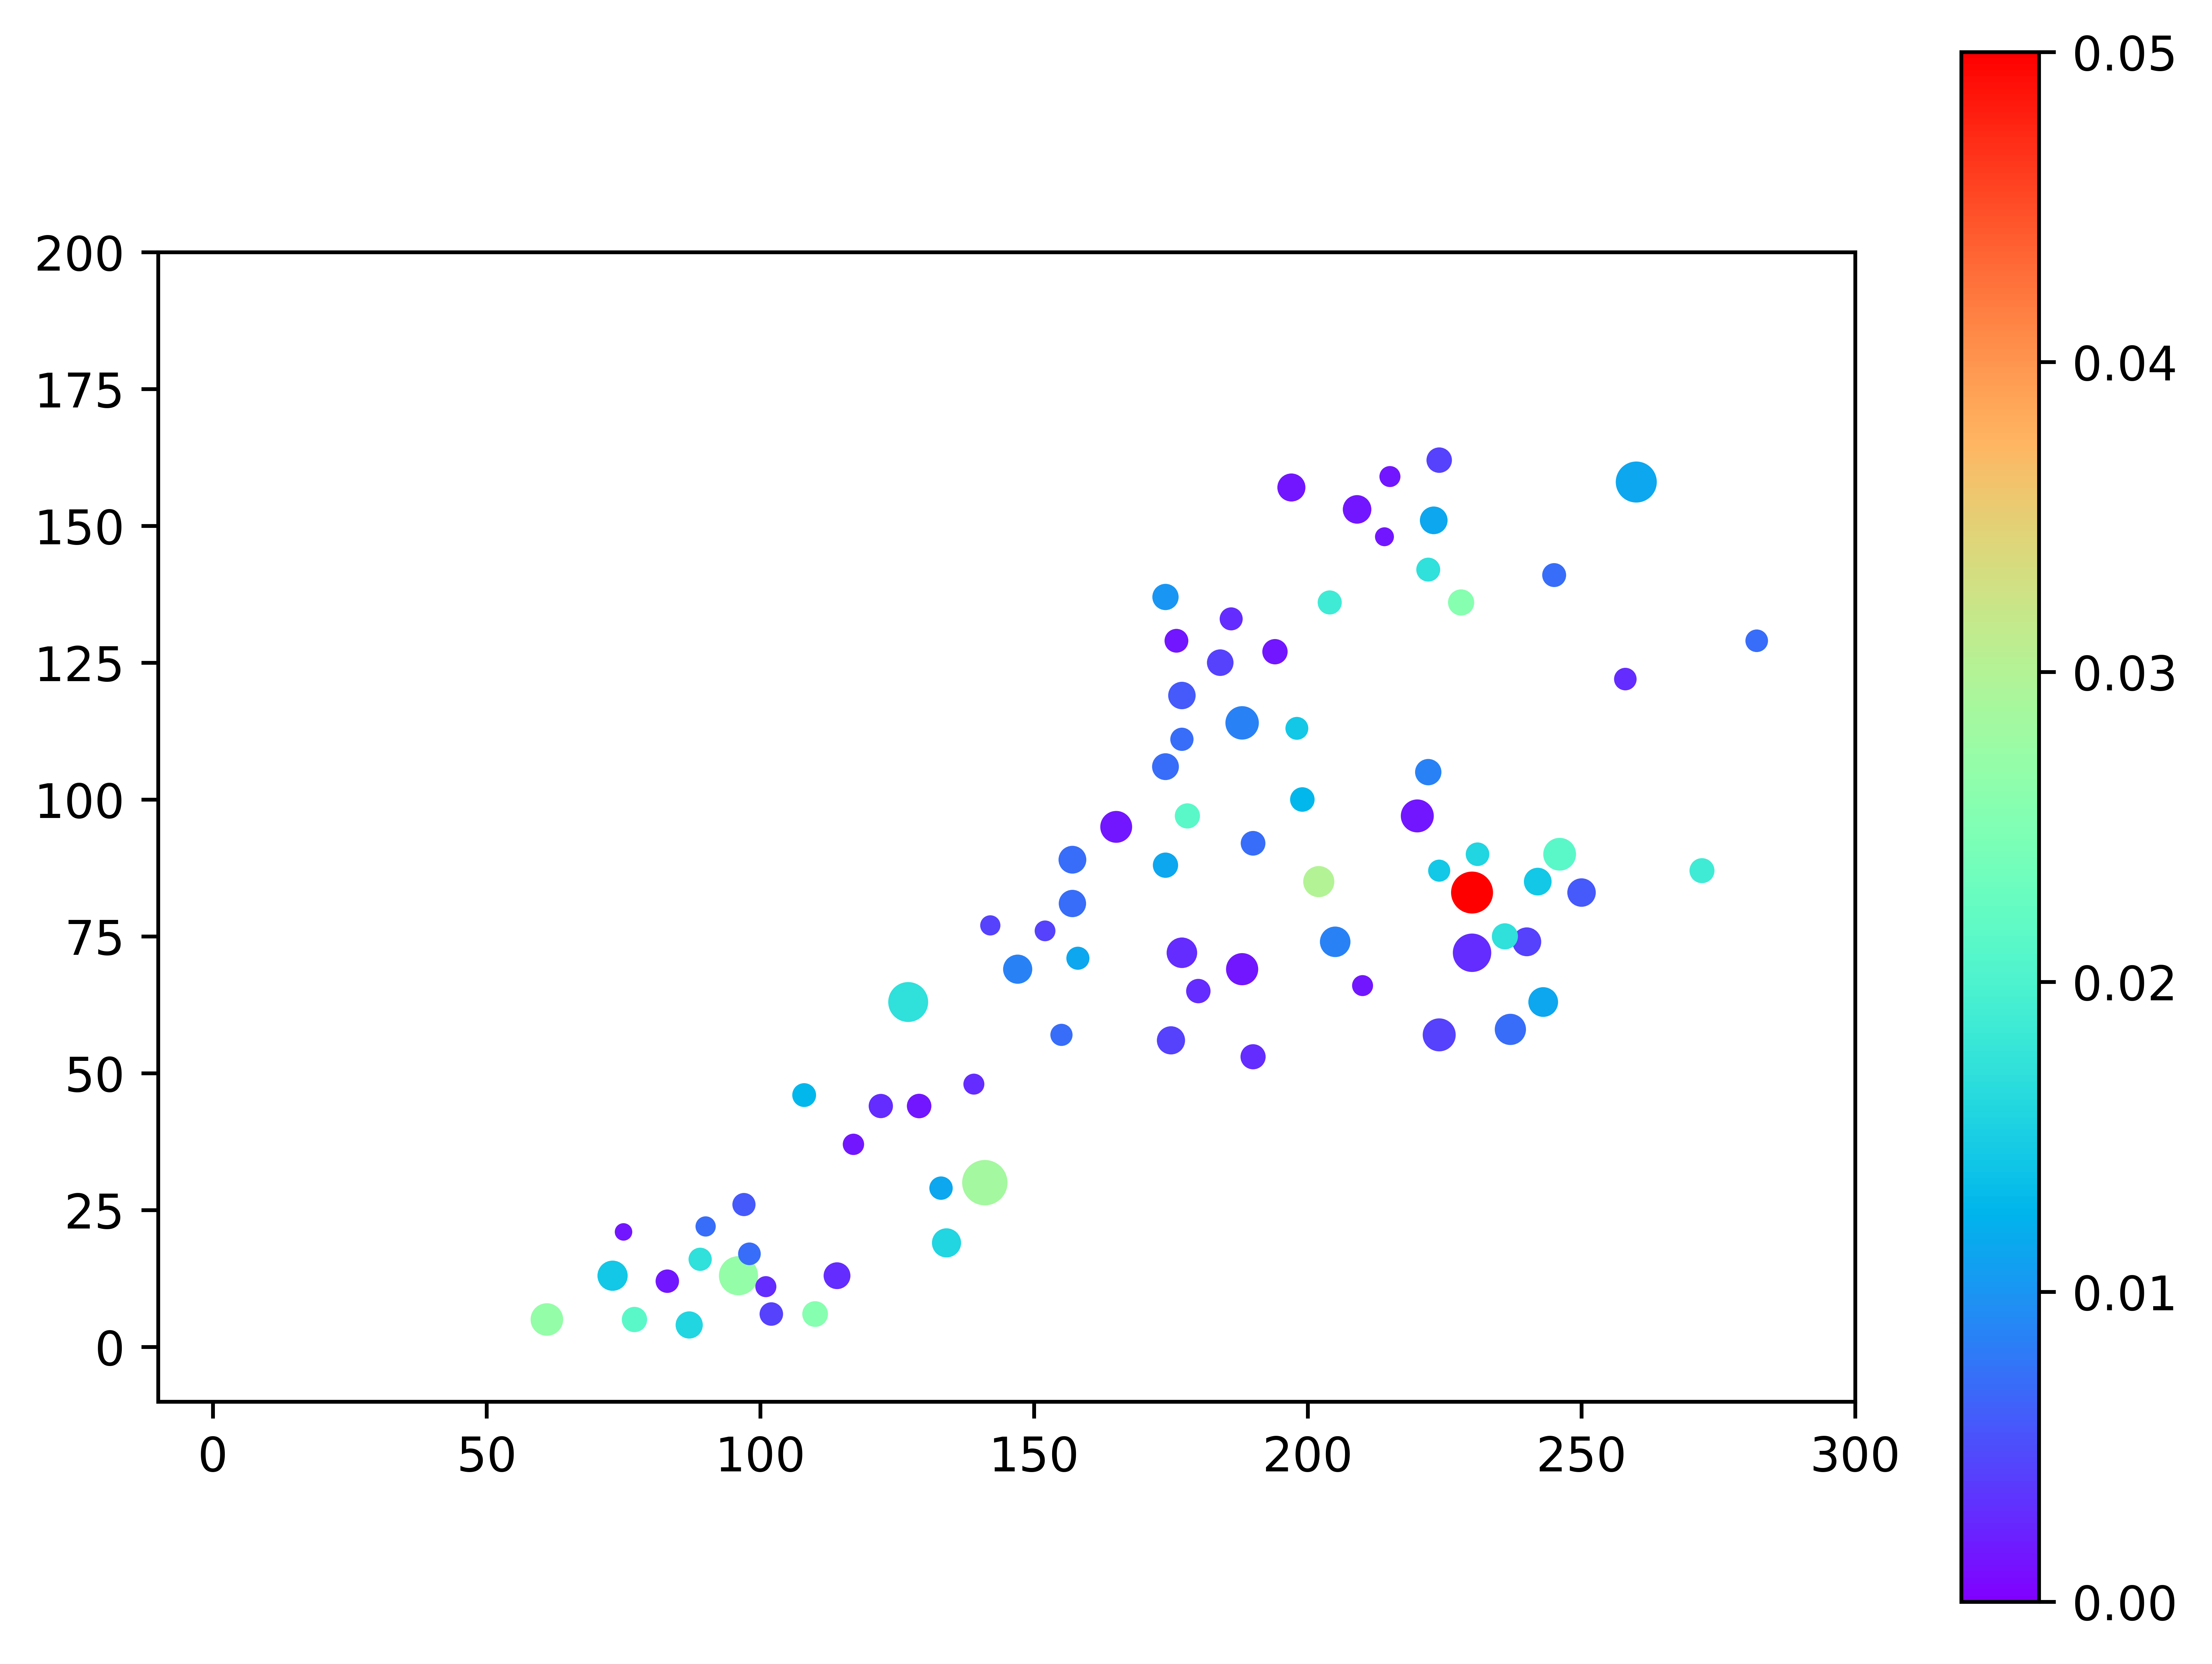

In [130]:
circle_size = metrics_df[accept_i]['snr'] 
circle_size=[i  if i<250 else 250 for i in circle_size]

fig, ax = plt.subplots(figsize=(8,6),dpi=1000)
plt.scatter(metrics_df[accept_i]['largestComponentCenterInPixelsX'],
metrics_df[accept_i]['largestComponentCenterInPixelsY'],
c=metrics_df[accept_i]['eventRate'], s=circle_size,
cmap=plt.cm.rainbow)
plt.clim(0, 0.05)
plt.ylim((-10,200))
plt.xlim((-10,300));
ax.set_aspect('equal')
plt.colorbar()

plt.savefig(os.path.join(folder_out, name+'_MAP.eps'), dpi=1000)

In [91]:
circle_size

[3.91055, 4.69034, -1.41964, 0.0, 0.0, -5.85494]

In [92]:
cellset_file

'//172.16.251.125/Inscopix/Francesco/H2222 - 4X/H2222_4X_ALL_PH2/H2222_4X_ALLO_PH2/CNMFe-SET/2020-11-25-11-27-12_video-PP-BP-MC-CNMFE-p11.isxd'

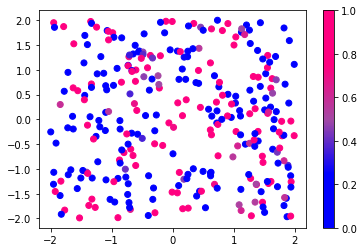

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors
x,y,c = zip(*np.random.rand(300,3)*4-2)

norm=plt.Normalize(0,1) 

bi = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ff0080","#ff0080","#a349a4","#0000ff","#0000ff"]) 

bi_r = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#0000ff","#0000ff","#a349a4","#ff0080","#ff0080"]) #reversed

plt.scatter(x,y,c=c, cmap=bi_r, norm=norm) 
plt.colorbar() 
plt.show()